In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Análise exploratória dos dados (EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#Verificar os valores únicos de colunas categóricas
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for column in categorical_columns:
    print(f'{column}: {data[column].unique()}')
    
data.isnull().sum()


# Tratamento de valores inconsistentes em 'TotalCharges' (valores vazios ou espaços)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Preencher os valores ausentes em 'TotalCharges' com a mediana
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Visualizar novamente as informações para confirmar as mudanças
data.info()

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-n

C:\Users\luizg\AppData\Local\Temp\ipykernel_3740\2770528866.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificação das variáveis categóricas com LabelEncoder
le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['Partner'] = le.fit_transform(data['Partner'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['PhoneService'] = le.fit_transform(data['PhoneService'])
data['MultipleLines'] = le.fit_transform(data['MultipleLines'].replace('No phone service', 'No'))
data['InternetService'] = le.fit_transform(data['InternetService'])
data['OnlineSecurity'] = le.fit_transform(data['OnlineSecurity'].replace('No internet service', 'No'))
data['DeviceProtection'] = le.fit_transform(data['DeviceProtection'].replace('No internet service', 'No'))
data['TechSupport'] = le.fit_transform(data['TechSupport'].replace('No internet service', 'No'))
data['StreamingTV'] = le.fit_transform(data['StreamingTV'].replace('No internet service', 'No'))
data['StreamingMovies'] = le.fit_transform(data['StreamingMovies'].replace('No internet service', 'No'))
data['Contract'] = le.fit_transform(data['Contract'])
data['PaperlessBilling'] = le.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = le.fit_transform(data['PaymentMethod'])
data['Churn'] = le.fit_transform(data['Churn'])  # Coluna alvo

# Definindo as variáveis independentes (features) e a variável alvo (target)
X = data.drop(columns=['customerID', 'Churn'])  # Removemos customerID e a coluna alvo
y = data['Churn']

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensões dos dados de treino:", X_train.shape)
print("Dimensões dos dados de teste:", X_test.shape)

Dimensões dos dados de treino: (5634, 19)
Dimensões dos dados de teste: (1409, 19)


In [8]:
# Aplicar One-Hot Encoding em todas as variáveis categóricas
X = pd.get_dummies(data.drop(columns=['customerID', 'Churn']), drop_first=True)

# Definir a variável alvo
y = data['Churn']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as dimensões após One-Hot Encoding
print(X_train.shape, X_test.shape)

# Agora, treinar o modelo novamente
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(X_test)

# Avaliar o modelo
print("Acurácia do Random Forest:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

(5634, 20) (1409, 20)
Acurácia do Random Forest: 0.7984386089425124

Matriz de Confusão:
[[948  88]
 [196 177]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [9]:
from sklearn.model_selection import GridSearchCV

# Definindo a grade de parâmetros para ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Instanciando o GridSearchCV com o modelo Random Forest
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Ajustando o modelo aos dados de treino
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Fazer previsões usando o melhor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Avaliação do modelo ajustado
print("Acurácia do modelo ajustado:", accuracy_score(y_test, y_pred_best))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_best))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


d:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parame

Melhores parâmetros encontrados: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}
Acurácia do modelo ajustado: 0.8076650106458482

Matriz de Confusão:
[[947  89]
 [182 191]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



                             feature  importance
17                      TotalCharges    0.169483
4                             tenure    0.164707
16                    MonthlyCharges    0.151663
13                          Contract    0.150956
7                    InternetService    0.062102
15                     PaymentMethod    0.046990
18  OnlineBackup_No internet service    0.031663
8                     OnlineSecurity    0.029374
14                  PaperlessBilling    0.027089
10                       TechSupport    0.025193


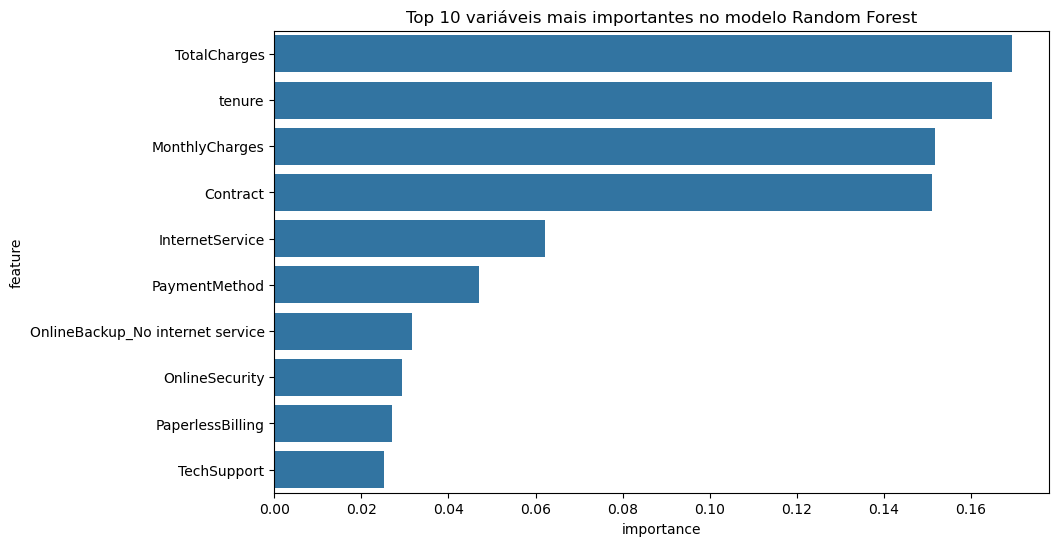

In [10]:
# Obter a importância das variáveis
importances = best_model.feature_importances_

# Criar um dataframe para visualizar as importâncias
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Visualizar as 10 variáveis mais importantes
print(feature_importance.head(10))

# Plotar as 10 variáveis mais importantes
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 variáveis mais importantes no modelo Random Forest')
plt.show()

In [11]:
from xgboost import XGBClassifier

# Instanciar o modelo XGBoost
xgb_model = XGBClassifier(random_state=42)

# Treinar o modelo
xgb_model.fit(X_train, y_train)

# Fazer previsões
y_pred_xgb = xgb_model.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia do XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_xgb))

Acurácia do XGBoost: 0.7814052519517388

Matriz de Confusão:
[[913 123]
 [185 188]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.60      0.50      0.55       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [12]:
! pip install lightgbm

In [13]:
import lightgbm as lgb

# Instanciar o modelo LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)

# Treinar o modelo
lgb_model.fit(X_train, y_train)

# Fazer previsões
y_pred_lgb = lgb_model.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia do LightGBM:", accuracy_score(y_test, y_pred_lgb))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_lgb))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
Acurácia do LightGBM: 0.8026969481902059

Matriz de Confusão:
[[931 105]
 [173 200]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72 

In [14]:
# Consolidar as métricas dos três modelos
from sklearn.metrics import roc_auc_score

# Avaliar Random Forest
rf_acc = accuracy_score(y_test, y_pred_best)
rf_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Avaliar XGBoost
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Avaliar LightGBM
lgb_acc = accuracy_score(y_test, y_pred_lgb)
lgb_auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

# Mostrar os resultados
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'Accuracy': [rf_acc, xgb_acc, lgb_acc],
    'AUC': [rf_auc, xgb_auc, lgb_auc]
})

print(results)

           Model  Accuracy       AUC
0  Random Forest  0.807665  0.858815
1        XGBoost  0.781405  0.837117
2       LightGBM  0.802697  0.851353


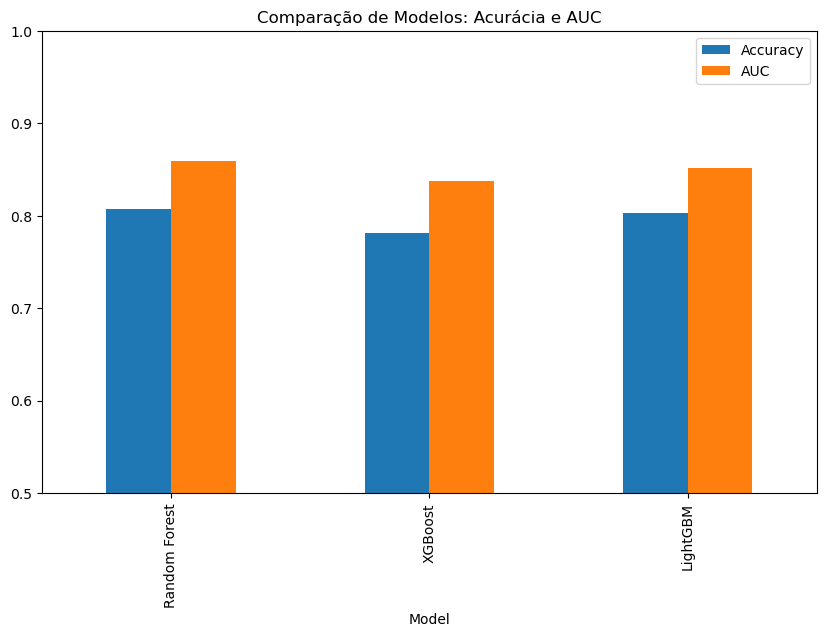

In [15]:
# Visualizar as métricas de Acurácia e AUC
results.set_index('Model').plot(kind='bar', figsize=(10,6), ylim=(0.5, 1.0), title='Comparação de Modelos: Acurácia e AUC')
plt.show()

# Verificação do desbalanceamento das classes

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


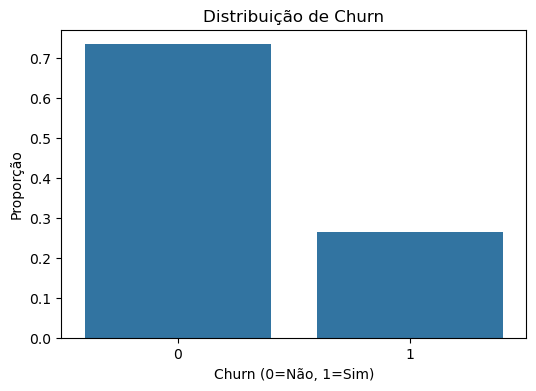

In [16]:
# Verifica o balanceamento das classes
churn_distribution = y.value_counts(normalize=True)
print(churn_distribution)

# Visualizar a distribuição das classes
plt.figure(figsize=(6,4))
sns.barplot(x=churn_distribution.index, y=churn_distribution.values)
plt.title('Distribuição de Churn')
plt.xlabel('Churn (0=Não, 1=Sim)')
plt.ylabel('Proporção')
plt.show()

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Definindo o grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Instanciar o RandomizedSearchCV com XGBoost
random_search = RandomizedSearchCV(estimator=XGBClassifier(random_state=42), param_distributions=param_grid,
                                   n_iter=10, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

# Treinar o modelo
random_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros encontrados:", random_search.best_params_)

# Avaliar o desempenho do melhor modelo
best_xgb = random_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Avaliar o desempenho
print("Acurácia do XGBoost otimizado:", accuracy_score(y_test, y_pred_best_xgb))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_best_xgb))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Melhores parâmetros encontrados: {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Acurácia do XGBoost otimizado: 0.8019872249822569

Matriz de Confusão:
[[945  91]
 [188 185]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



# Ajuste de Pesos nas Classes (class_weight)

In [18]:
# Ajustar o modelo Random Forest com pesos nas classes
rf_model_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Treinar o modelo com pesos ajustados
rf_model_weighted.fit(X_train, y_train)

# Fazer previsões
y_pred_rf_weighted = rf_model_weighted.predict(X_test)

# Avaliar o desempenho
print("Acurácia com pesos no Random Forest:", accuracy_score(y_test, y_pred_rf_weighted))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf_weighted))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf_weighted))

Acurácia com pesos no Random Forest: 0.7955997161107168

Matriz de Confusão:
[[949  87]
 [201 172]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [19]:
# Definir a proporção entre as classes
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]  # Classe 0 sobre Classe 1

# Ajustar o modelo XGBoost com pesos nas classes
xgb_model_weighted = XGBClassifier(random_state=42, scale_pos_weight=ratio)

# Treinar o modelo
xgb_model_weighted.fit(X_train, y_train)

# Fazer previsões
y_pred_xgb_weighted = xgb_model_weighted.predict(X_test)

# Avaliar o desempenho
print("Acurácia com pesos no XGBoost:", accuracy_score(y_test, y_pred_xgb_weighted))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_xgb_weighted))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_xgb_weighted))

Acurácia com pesos no XGBoost: 0.7693399574166075

Matriz de Confusão:
[[833 203]
 [122 251]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1036
           1       0.55      0.67      0.61       373

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409



In [21]:
! pip install imbalanced-learn

In [22]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicar Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Treinar o modelo após Undersampling
xgb_model_undersample = XGBClassifier(random_state=42)
xgb_model_undersample.fit(X_train_res, y_train_res)

# Fazer previsões
y_pred_undersample = xgb_model_undersample.predict(X_test)

# Avaliar o desempenho
print("Acurácia após Undersampling:", accuracy_score(y_test, y_pred_undersample))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_undersample))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_undersample))

Acurácia após Undersampling: 0.7331440738112136

Matriz de Confusão:
[[736 300]
 [ 76 297]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1036
           1       0.50      0.80      0.61       373

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1036
           1       0.50      0.80      0.61       373

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409

AUC-ROC: 0.8226


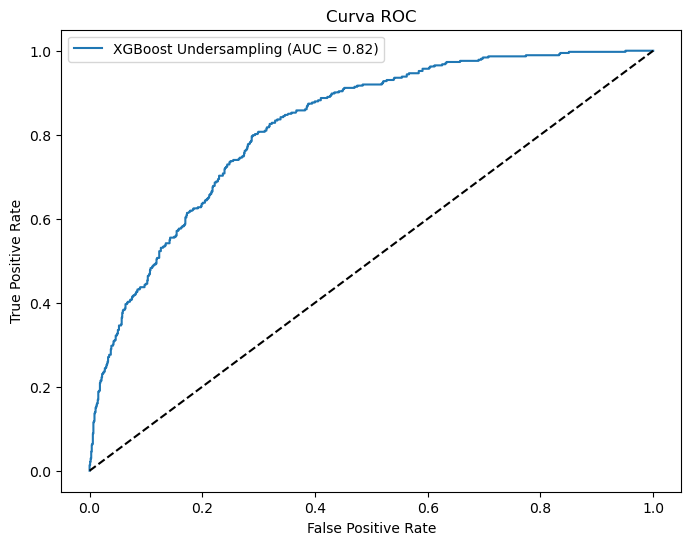

In [23]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Avaliar o F1-score, precisão e recall
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_undersample))

# Avaliar a AUC-ROC
y_pred_proba_undersample = xgb_model_undersample.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba_undersample)
print(f"AUC-ROC: {auc_score:.4f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_undersample)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='XGBoost Undersampling (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

In [24]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Random Forest com ajuste de pesos
rf_acc = accuracy_score(y_test, y_pred_rf_weighted)
rf_f1 = classification_report(y_test, y_pred_rf_weighted, output_dict=True)['weighted avg']['f1-score']
rf_auc = roc_auc_score(y_test, rf_model_weighted.predict_proba(X_test)[:, 1])

# XGBoost sem undersampling
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = classification_report(y_test, y_pred_xgb, output_dict=True)['weighted avg']['f1-score']
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# XGBoost com undersampling
xgb_us_acc = accuracy_score(y_test, y_pred_undersample)
xgb_us_f1 = classification_report(y_test, y_pred_undersample, output_dict=True)['weighted avg']['f1-score']
xgb_us_auc = roc_auc_score(y_test, xgb_model_undersample.predict_proba(X_test)[:, 1])

# Consolidar os resultados em um DataFrame
results = pd.DataFrame({
    'Model': ['Random Forest (Pesos)', 'XGBoost (Sem Undersampling)', 'XGBoost (Undersampling)'],
    'Accuracy': [rf_acc, xgb_acc, xgb_us_acc],
    'F1-score': [rf_f1, xgb_f1, xgb_us_f1],
    'AUC-ROC': [rf_auc, xgb_auc, xgb_us_auc]
})

print(results)

                         Model  Accuracy  F1-score   AUC-ROC
0        Random Forest (Pesos)  0.795600  0.782495  0.835012
1  XGBoost (Sem Undersampling)  0.781405  0.774674  0.837117
2      XGBoost (Undersampling)  0.733144  0.747783  0.822647


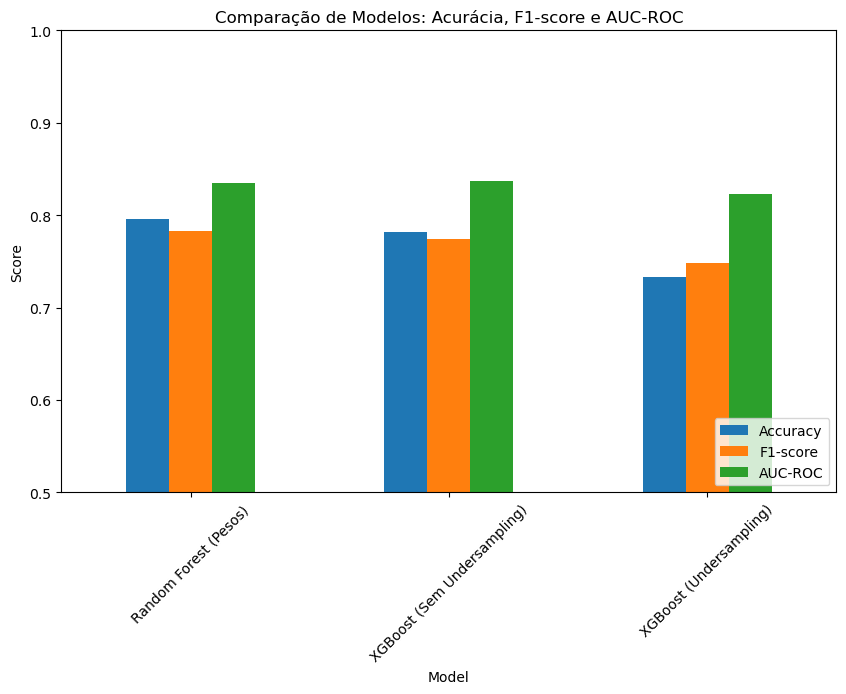

In [25]:
import matplotlib.pyplot as plt

# Plotar as métricas em um gráfico de barras
results.set_index('Model').plot(kind='bar', figsize=(10,6), ylim=(0.5, 1.0), title='Comparação de Modelos: Acurácia, F1-score e AUC-ROC')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()